# P2 | Credit Card Revival

## 1.1 Introduction

This midbootcamp project will focus in a classification problem: as a risk analyst of a bank I will analyse and understand the demographics and other characteristics of the bank customer's that accept or reject a credit card offer, using linear regression.

## 1.2 Import Libraries

In [91]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import warnings
warnings.filterwarnings('ignore')

## 1.3 Import data

In [34]:
data = pd.read_csv('creditcardmarketing.csv')

In [39]:
data.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


## 2. Explore & Cleaning data

### 2.1 Explore data

In [41]:
data.shape

(18000, 17)

In [36]:
data.dtypes

Customer Number           int64
Offer Accepted           object
Reward                   object
Mailer Type              object
Income Level             object
# Bank Accounts Open      int64
Overdraft Protection     object
Credit Rating            object
# Credit Cards Held       int64
# Homes Owned             int64
Household Size            int64
Own Your Home            object
Average Balance         float64
Q1 Balance              float64
Q2 Balance              float64
Q3 Balance              float64
Q4 Balance              float64
dtype: object

##### Checking for null values:

In [44]:
nulls = pd.DataFrame(data.isna().sum()*100/len(data), columns=['percentage'])
nulls.sort_values('percentage', ascending = False)

,percentage
Q4 Balance,0.133333
Q3 Balance,0.133333
Q2 Balance,0.133333
Q1 Balance,0.133333
Average Balance,0.133333
# Homes Owned,0.000000
Own Your Home,0.000000
Household Size,0.000000
Customer Number,0.000000
Offer Accepted,0.000000


###### Note: As the columns with null values might be important to my model, I will not drop them and will deal with them later.

In [43]:
data.describe().apply(lambda x: round(x,2))

,Customer Number,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
count,18000.00,18000.00,18000.0,18000.00,18000.00,17976.00,17976.00,17976.00,17976.00,17976.00
mean,9000.50,1.26,1.9,1.20,3.50,940.52,910.45,999.39,1042.03,810.19
std,5196.30,0.47,0.8,0.43,1.11,350.30,620.08,457.40,553.45,559.00
min,1.00,1.00,1.0,1.00,1.00,48.25,0.00,0.00,0.00,0.00
25%,4500.75,1.00,1.0,1.00,3.00,787.50,392.75,663.00,633.00,363.00
50%,9000.50,1.00,2.0,1.00,3.00,1007.00,772.00,1032.00,945.50,703.00
75%,13500.25,1.00,2.0,1.00,4.00,1153.25,1521.00,1342.00,1463.00,1212.00
max,18000.00,3.00,4.0,3.00,9.00,3366.25,3450.00,3421.00,3823.00,4215.00


##### I would like to see the unique values for each column:

In [67]:
def unique_val(df):
    for col_names in list(df):
        print(col_names)
        print(df[col_names].unique())

In [68]:
unique_val(data)

Customer Number
[    1     2     3 ... 17998 17999 18000]
Offer Accepted
['No' 'Yes']
Reward
['Air Miles' 'Cash Back' 'Points']
Mailer Type
['Letter' 'Postcard']
Income Level
['High' 'Medium' 'Low']
# Bank Accounts Open
[1 2 3]
Overdraft Protection
['No' 'Yes']
Credit Rating
['High' 'Medium' 'Low']
# Credit Cards Held
[2 1 3 4]
# Homes Owned
[1 2 3]
Household Size
[4 5 2 6 3 1 8 9]
Own Your Home
['No' 'Yes']
Average Balance
[1160.75  147.25  276.5  ...  691.   1649.   1427.25]
Q1 Balance
[1669.   39.  367. ... 1122. 2139. 1070.]
Q2 Balance
[ 877.  106.  352. ...   91. 1865. 1824.]
Q3 Balance
[1095.   78.  145. ... 2265. 2045. 1037.]
Q4 Balance
[1002.  366.  242. ... 1946. 2035. 2188.]


### 2.2 Cleaning the data

##### Cleaning column hearders:

In [69]:
data.columns = [column.lower().replace(' ', '_') for column in data.columns]
data.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,#_bank_accounts_open,overdraft_protection,credit_rating,#_credit_cards_held,#_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


##### Renaming columns to remove '#' and '_' :

In [70]:
data.rename(columns={'#_bank_accounts_open': 'bank_accounts_open', '#_credit_cards_held':'credit_cards_held', '#_homes_owned':'homes_owned'}, index={'ONE': 'Row_1'}, inplace=True)

In [71]:
data.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


##### Exporting data to csv to be used in SQL part of the project

In [30]:
data.to_csv('/Users/ritasilva/P2-Credit-Card-Revival/data/credit_card_data.csv', index = False)

##### Dealing with null values. I have replaced by the mean.

In [75]:
data[['average_balance', 'q1_balance','q2_balance', 'q3_balance', 'q4_balance']]=data[['average_balance', 'q1_balance','q2_balance', 'q3_balance', 'q4_balance']].fillna(value=data[['average_balance', 'q1_balance','q2_balance', 'q3_balance', 'q4_balance']].mean())


In [80]:
data.isnull().sum().sum()

0

## 3. EDA

### 3.1. Checking imbalance of data

I would like to see the value count for each columns, therefore I've created a function for it. Target variable is imbalanced, I will deal with it in the feature engineering bit.

In [84]:
def value_count(df):
    for column in df.columns:
         print("\n" + column)
         print(df[column].value_counts())

In [85]:
value_count(data)


customer_number
2047     1
17053    1
14994    1
12947    1
2708     1
        ..
15661    1
13612    1
3371     1
1322     1
2049     1
Name: customer_number, Length: 18000, dtype: int64

offer_accepted
No     16977
Yes     1023
Name: offer_accepted, dtype: int64

reward
Air Miles    6061
Cash Back    5999
Points       5940
Name: reward, dtype: int64

mailer_type
Postcard    9147
Letter      8853
Name: mailer_type, dtype: int64

income_level
Medium    9013
High      4526
Low       4461
Name: income_level, dtype: int64

bank_accounts_open
1    13692
2     4012
3      296
Name: bank_accounts_open, dtype: int64

overdraft_protection
No     15322
Yes     2678
Name: overdraft_protection, dtype: int64

credit_rating
High      6071
Medium    5972
Low       5957
Name: credit_rating, dtype: int64

credit_cards_held
2    7944
1    6154
3    3387
4     515
Name: credit_cards_held, dtype: int64

homes_owned
1    14523
2     3292
3      185
Name: homes_owned, dtype: int64

household_size
3    571

### 3.2. Data distribution and outliers

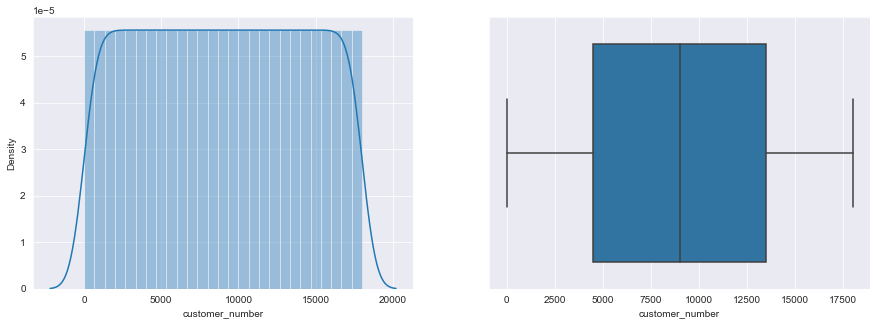

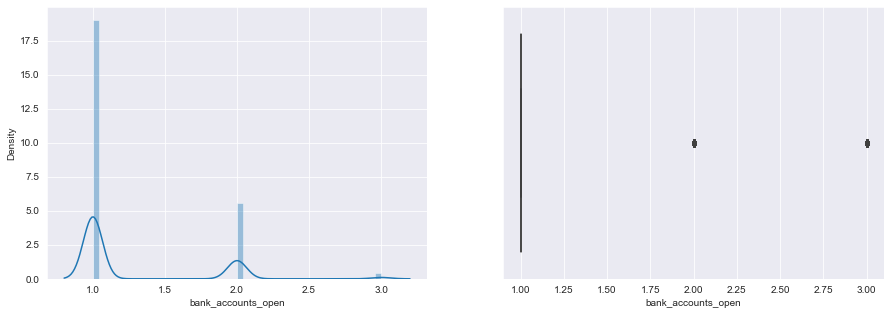

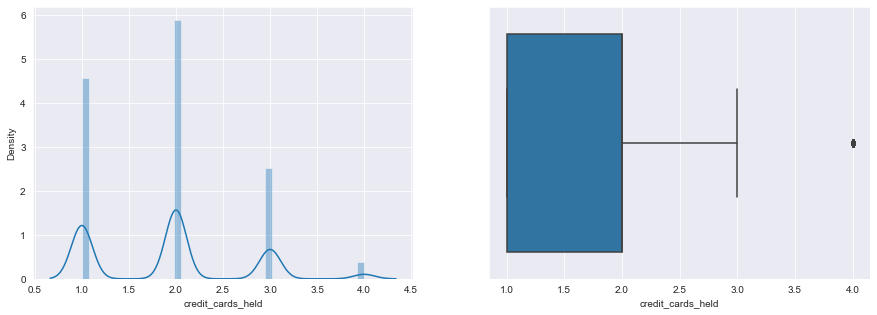

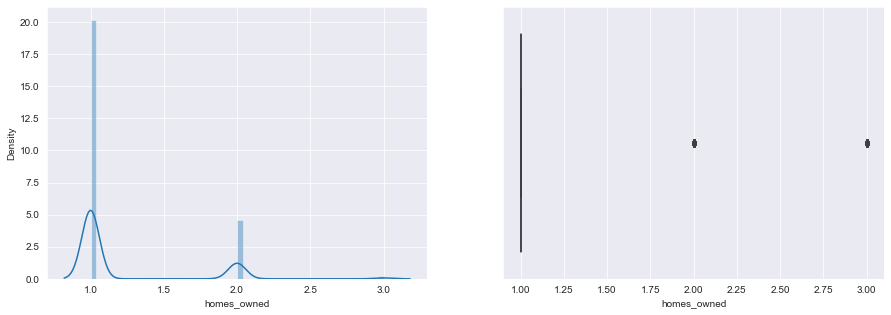

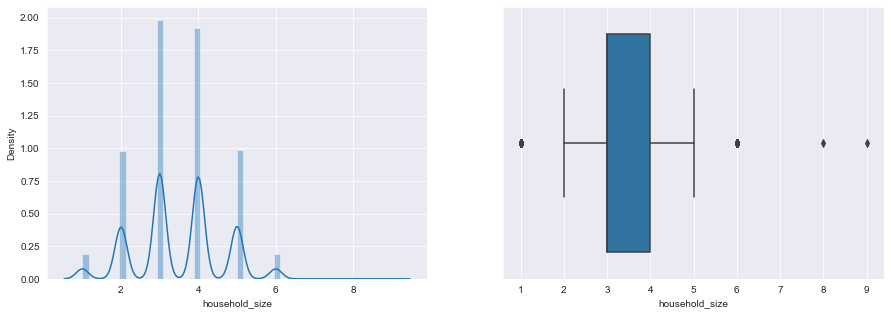

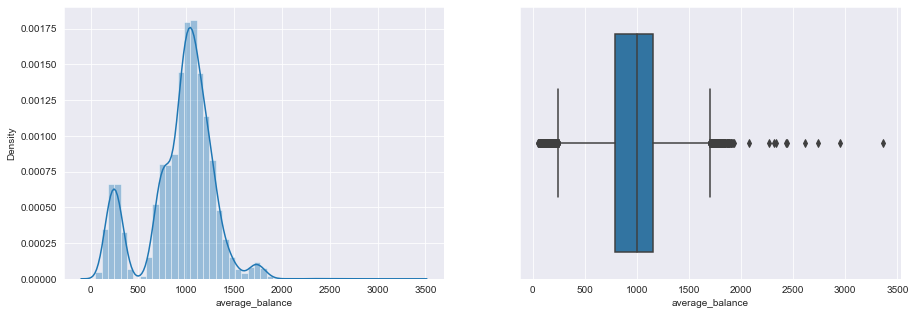

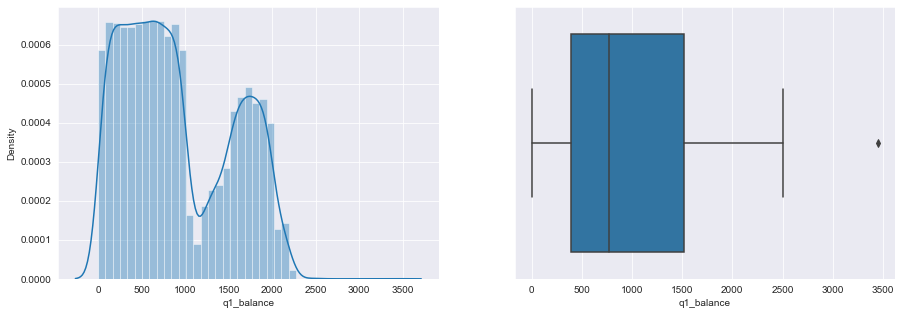

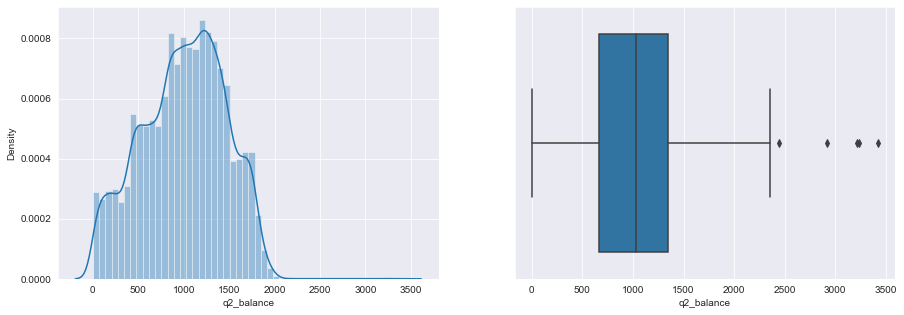

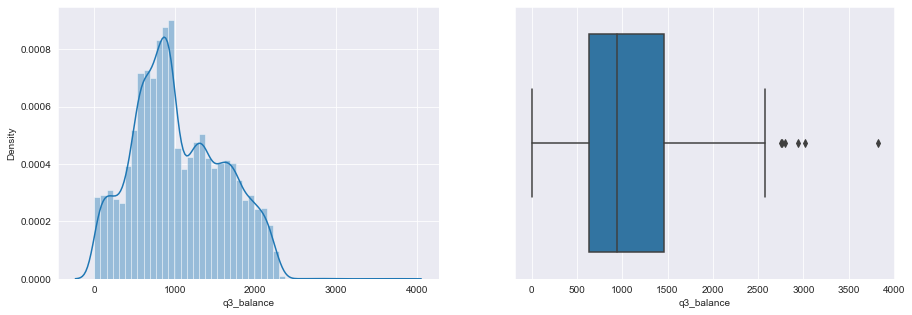

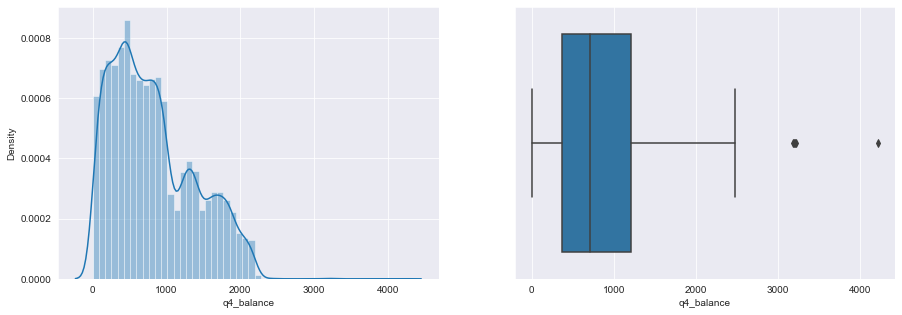

In [96]:
for col in data.select_dtypes(np.number):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.distplot(data[col], ax=axes[0])
    sns.boxplot(data[col], ax=axes[1])
    plt.show()

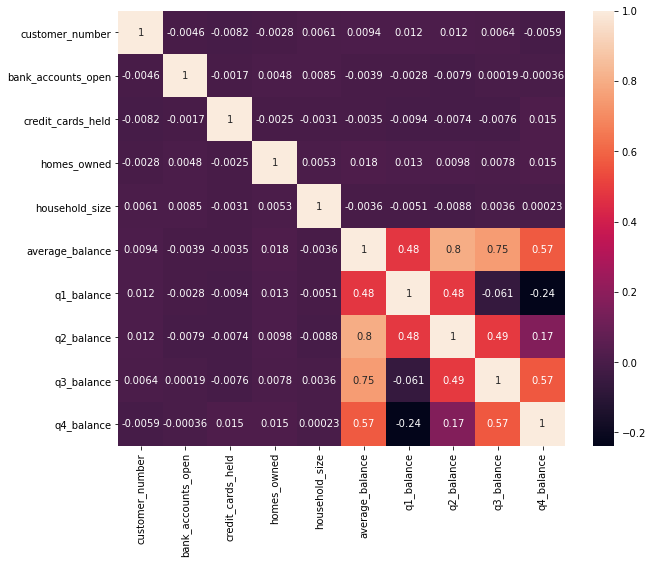

In [86]:
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()